In [1]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import pandas as pd
import numpy as np
import anndata as ad
import episcanpy.api as epi
import scanpy as sc
from scipy.sparse import csc_matrix

import os

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score


def getNClusters(adata,n_cluster,range_min=0,range_max=3,max_steps=20):
    this_step = 0
    this_min = float(range_min)
    this_max = float(range_max)
    while this_step < max_steps:
        print('step ' + str(this_step))
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.louvain(adata,resolution=this_resolution)
        this_clusters = adata.obs['louvain'].nunique()
        
        print('got ' + str(this_clusters) + ' at resolution ' + str(this_resolution))
        
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:
            return(this_resolution, adata)
        this_step += 1
    
    print('Cannot find the number of clusters')
    print('Clustering solution from last iteration is used:' + str(this_clusters) + ' at resolution ' + str(this_resolution))
    

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')


In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.



In [2]:
%%R -o features -o cells -o mtx
df_count = readRDS('./input/bonemarrow_clean.rds')
mtx=as.matrix(df_count)
features = df_count@Dimnames[[1]]
cells = df_count@Dimnames[[2]]

R[write to console]: Loading required package: Matrix



In [3]:
# format the data
mtx=csc_matrix(mtx).transpose()
cells = cells.tolist()
features = features.tolist()

adata = ad.AnnData(mtx,
                   obs=pd.DataFrame(index=cells),
                   var=pd.DataFrame(index=features))

# load metadata
metadata = pd.read_csv('./input/metadata.tsv',sep='\t',index_col=0)
num_clusters = len(np.unique(metadata['label']))
adata.obs['cell_type'] = metadata['label']

epi.pp.binarize(adata)
adata

AnnData object with n_obs × n_vars = 1200 × 156311 
    obs: 'cell_type'

AnnData object with n_obs × n_vars = 1200 × 61740 
    obs: 'cell_type', 'n_features'
    var: 'n_cells'


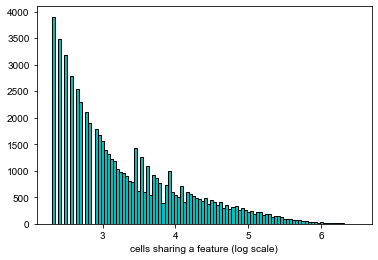

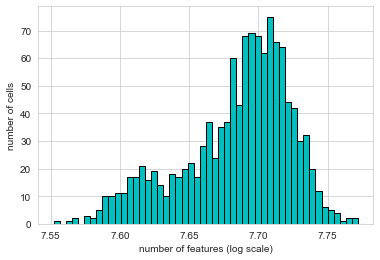

In [5]:
#epi.pp.commonness_features(adata, binary=True)
#epi.pp.coverage_cells(adata, binary=True)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=10)
epi.pp.filter_features(adata, max_cells=1190)
print(adata)
epi.pp.commonness_features(adata, binary=True, log=True)
epi.pp.coverage_cells(adata, binary=True, log=True)

... storing 'cell_type' as categorical


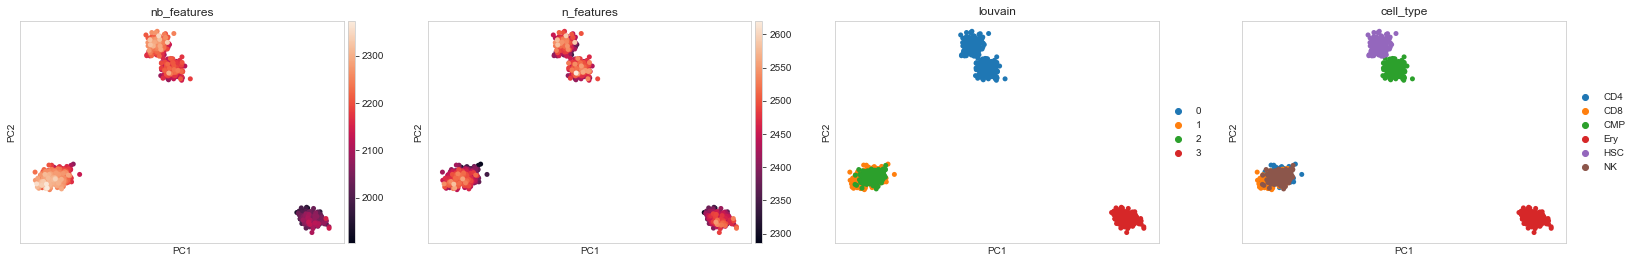

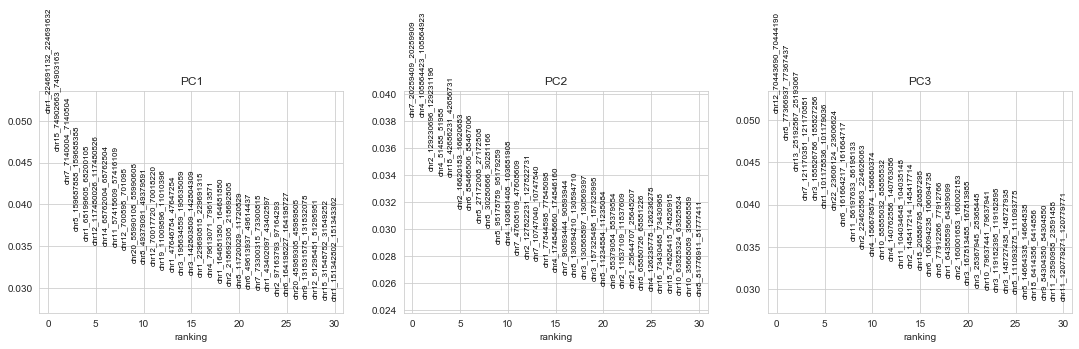

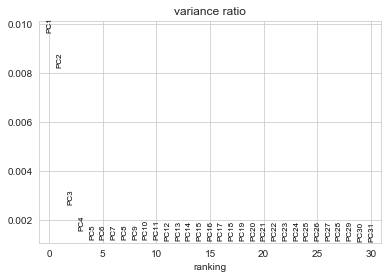

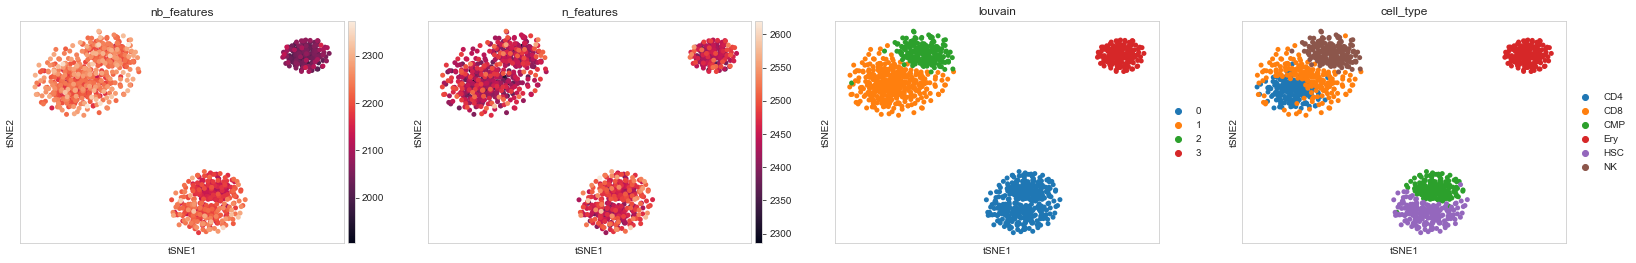

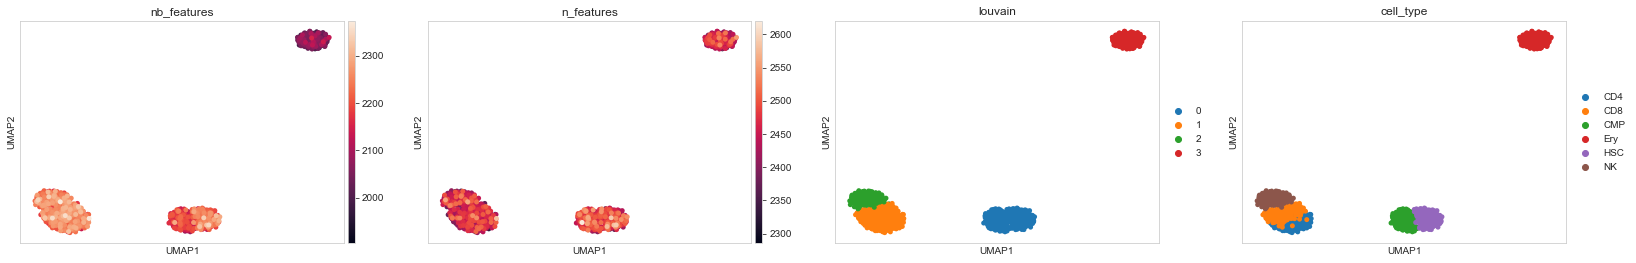

In [6]:
#adatareduced = epi.pp.select_var_feature(adata, nb_features=80000, copy=True)
#adatareduced
adatareduced = adata.copy()
#epi.pp.regress_out(adatareduced, 'n_features')

epi.pp.pca(adatareduced, n_comps=100)
epi.pp.neighbors(adatareduced, n_neighbors=15)
epi.tl.tsne(adatareduced)
epi.tl.umap(adatareduced)
epi.tl.louvain(adatareduced)


sc.pl.pca_overview(adatareduced, color=['nb_features', 'n_features', 'louvain', 'cell_type'])

#sc.pl.pca(adatareduced, color=['nb_features', 'n_features', 'louvain', 'cell_type'])
sc.pl.tsne(adatareduced, color=['nb_features', 'n_features', 'louvain', 'cell_type'])
sc.pl.umap(adatareduced, color=['nb_features', 'n_features', 'louvain', 'cell_type'])

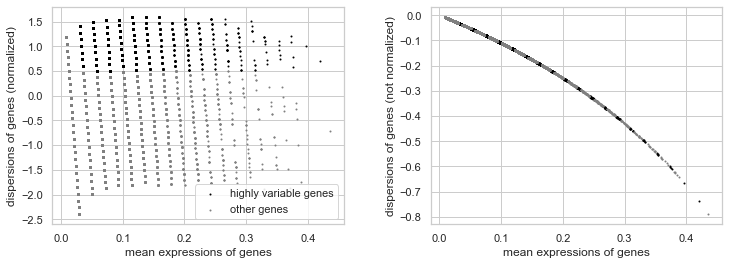

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

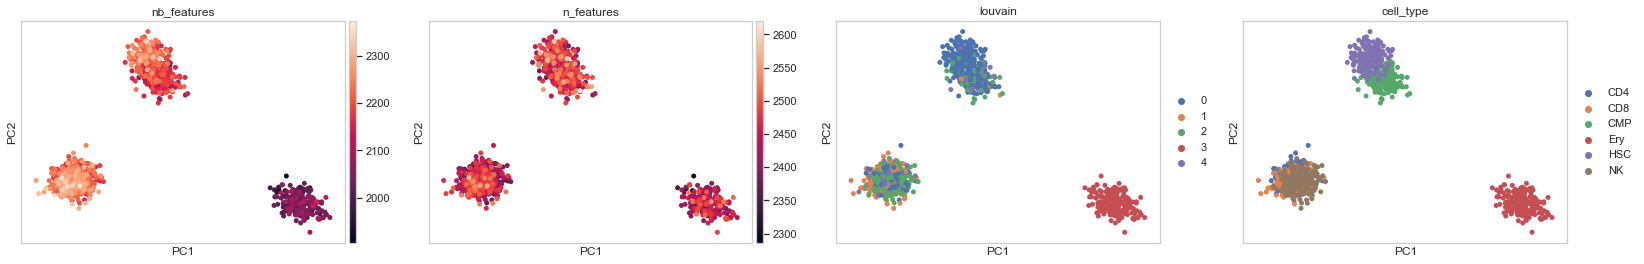

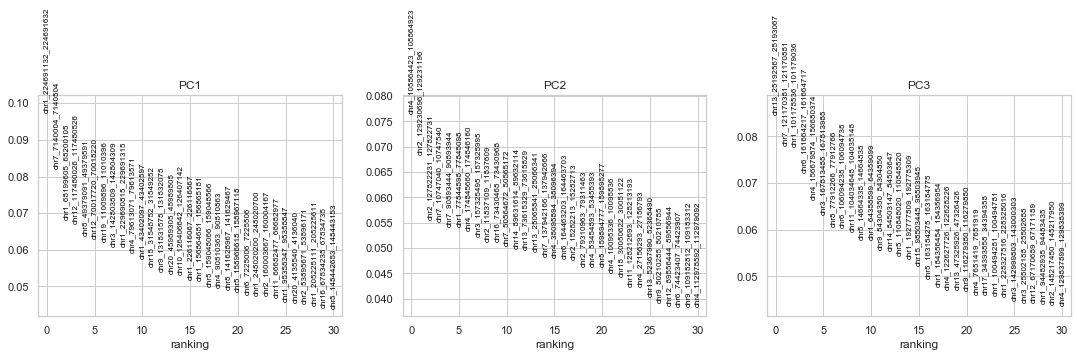

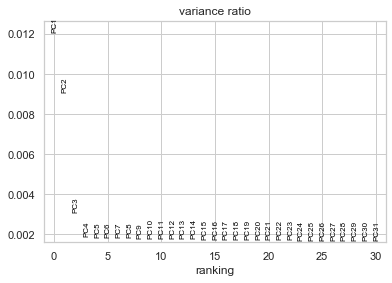

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

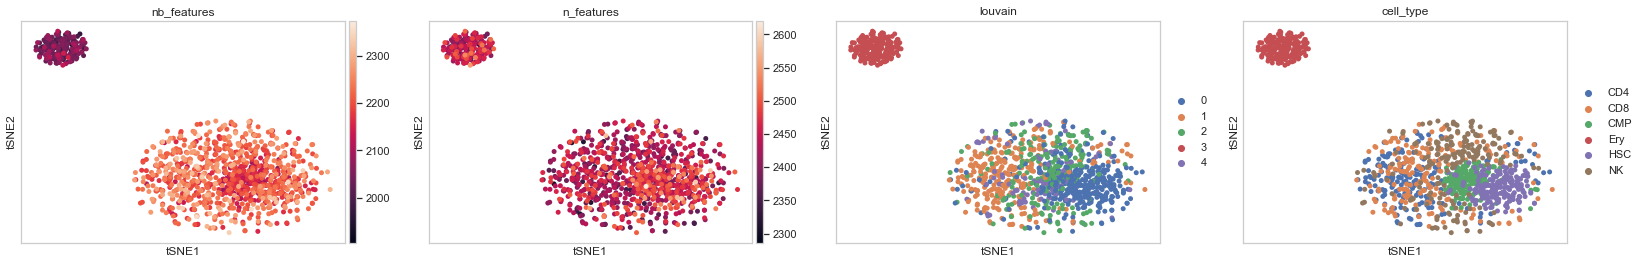

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

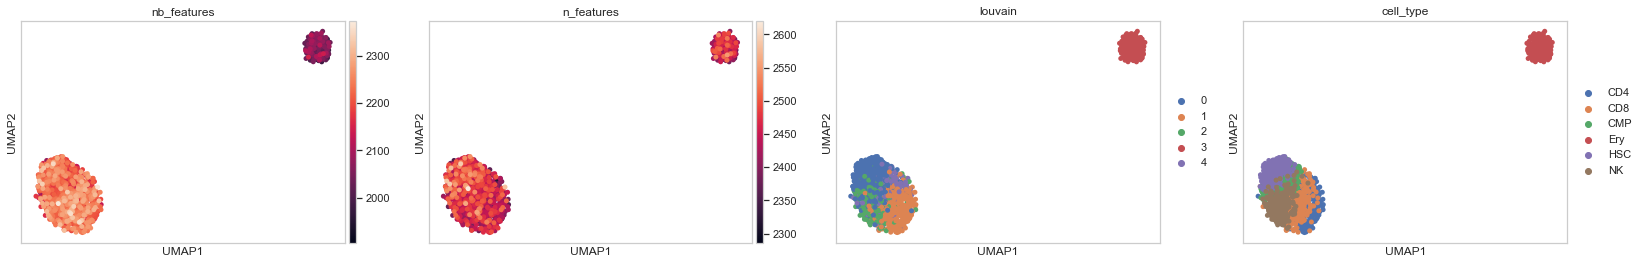

In [25]:
adatareduced2 = adatareduced.copy()
sc.pp.log1p(adatareduced2)

sc.pp.highly_variable_genes(adatareduced2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adatareduced2)
adatareduced2 = adatareduced2[:, adatareduced2.var['highly_variable']]

epi.pp.pca(adatareduced2, n_comps=100)
epi.pp.neighbors(adatareduced2, n_neighbors=15)
epi.tl.tsne(adatareduced2)
epi.tl.umap(adatareduced2)
epi.tl.louvain(adatareduced2)


sc.pl.pca_overview(adatareduced2, color=['nb_features', 'n_features', 'louvain', 'cell_type'])

#sc.pl.pca(adatareduced, color=['nb_features', 'n_features', 'louvain', 'cell_type'])
sc.pl.tsne(adatareduced2, color=['nb_features', 'n_features', 'louvain', 'cell_type'])
sc.pl.umap(adatareduced2, color=['nb_features', 'n_features', 'louvain', 'cell_type'])

... storing 'cell_type' as categorical


AnnData object with n_obs × n_vars = 1200 × 61740 
    obs: 'cell_type', 'n_features'
    var: 'n_cells'


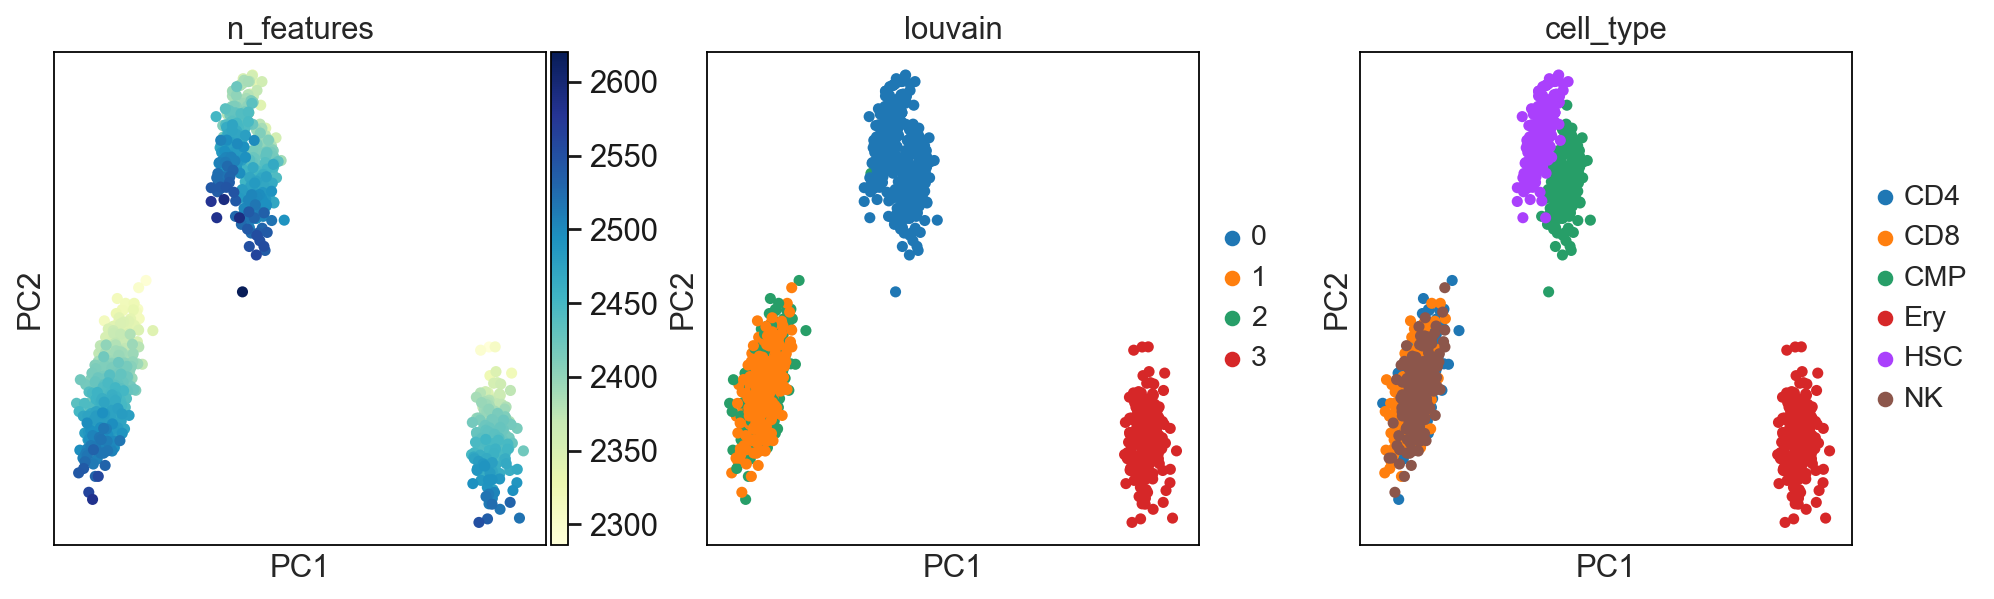

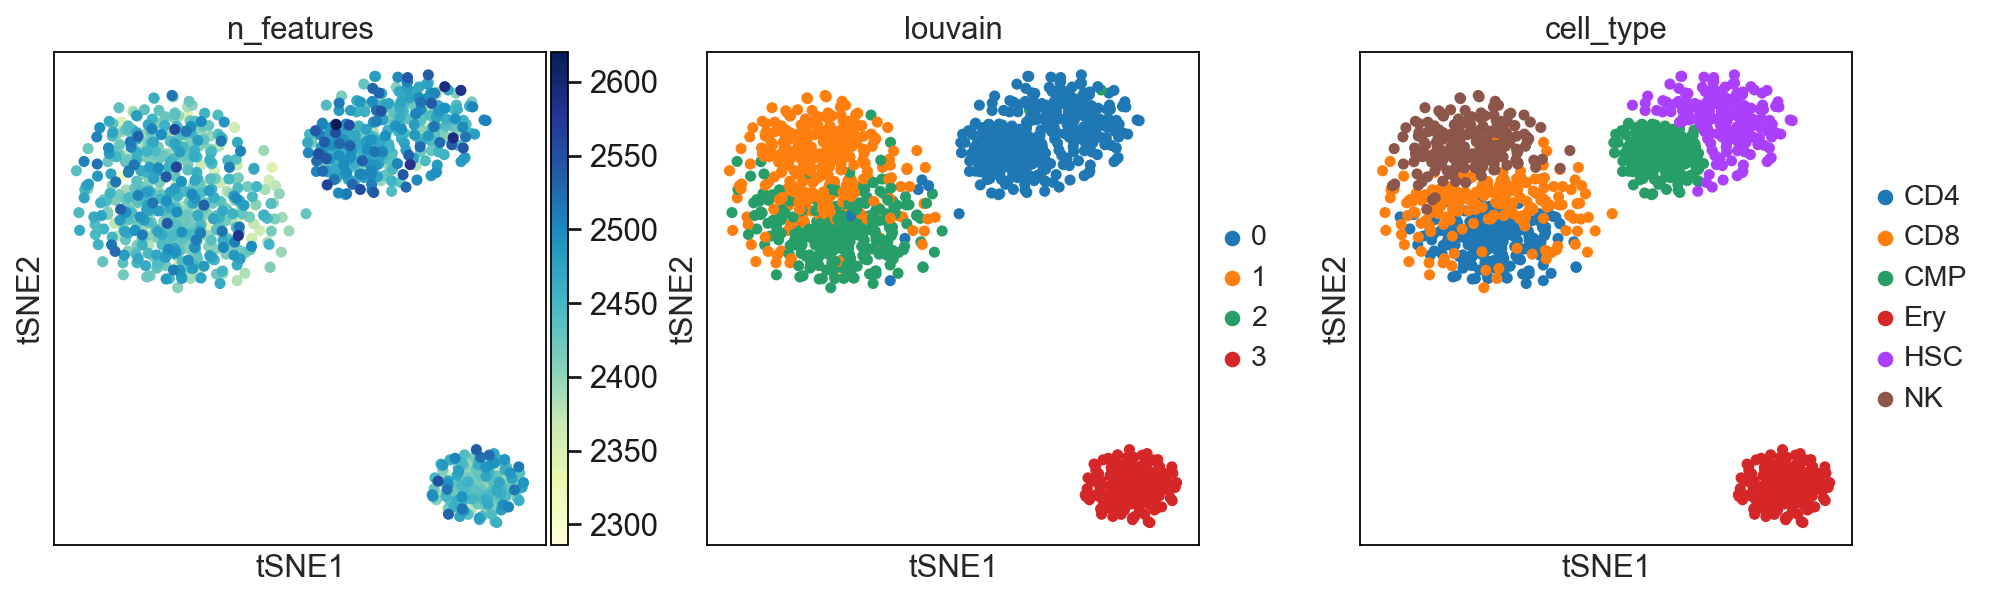

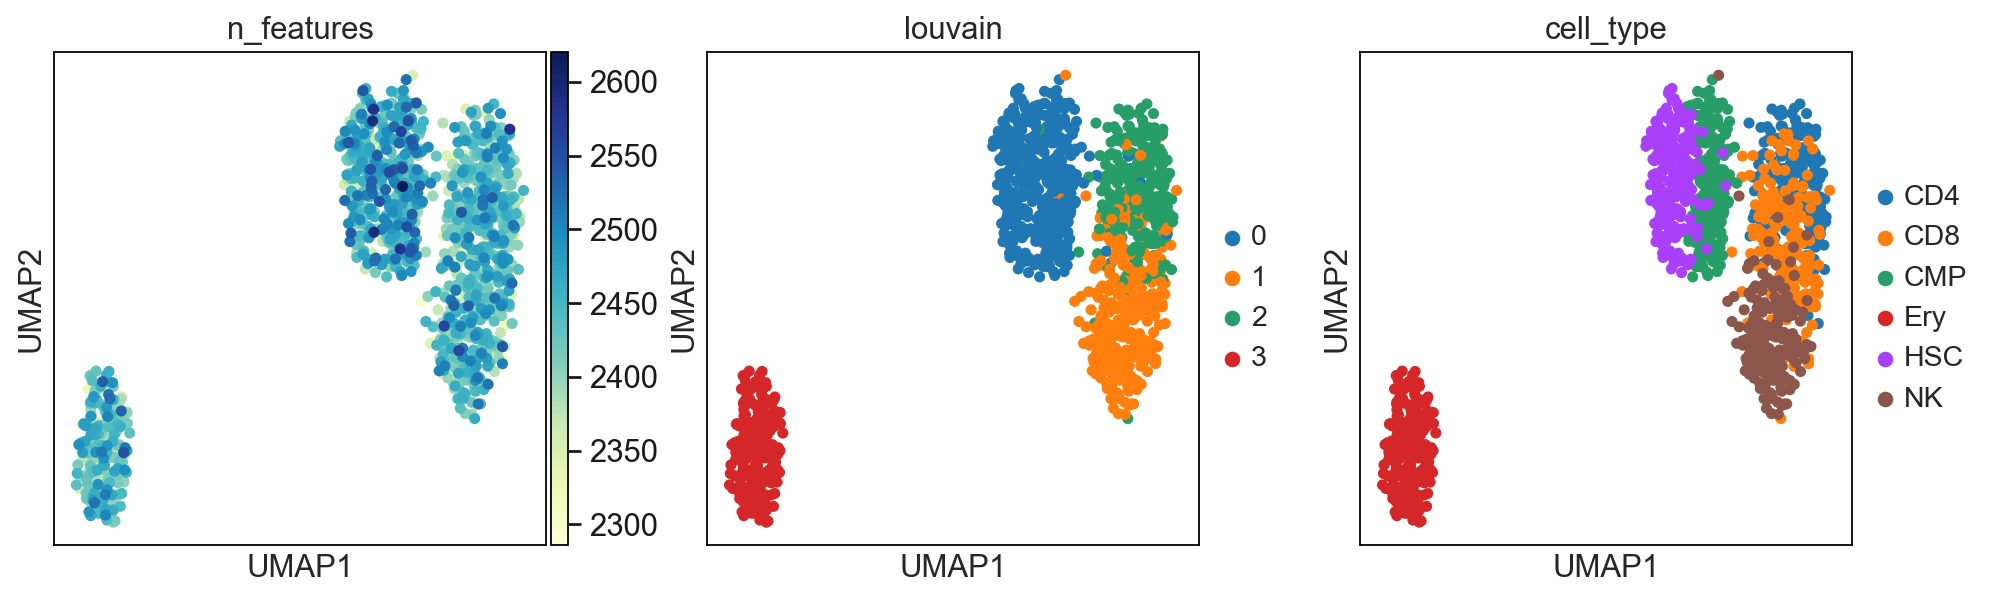

In [29]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

adata = ad.AnnData(mtx,
                   obs=pd.DataFrame(index=cells),
                   var=pd.DataFrame(index=features))

# load metadata
metadata = pd.read_csv('./input/metadata.tsv',sep='\t',index_col=0)
num_clusters = len(np.unique(metadata['label']))
adata.obs['cell_type'] = metadata['label']

epi.pp.binarize(adata)

epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=10)
adatavar = adata.copy()
print(adatavar)

sc.pp.regress_out(adatavar, 'n_features')
#sc.pp.normalize_total(adatavar, target_sum=1e6, exclude_highly_expressed=False,
#                                      max_fraction=0.05, key_added=None, layers=None,
#                                      layer_norm=None, inplace=True)

#sc.pp.log1p(adatavar)
#sc.pp.highly_variable_genes(adatavar, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pl.highly_variable_genes(adatavar)
#adatavar = adatavar[:, adatavar.var['highly_variable']]
#print(adatavar)

epi.pp.pca(adatavar, n_comps=100)
sc.pp.neighbors(adatavar, n_neighbors=5)
epi.tl.tsne(adatavar)
sc.tl.umap(adatavar)
epi.tl.louvain(adatavar)

sc.pl.pca(adatavar, color=[ 'n_features', 'louvain', 'cell_type'])
sc.pl.tsne(adatavar, color=[ 'n_features', 'louvain', 'cell_type'])
sc.pl.umap(adatavar, color=[ 'n_features', 'louvain', 'cell_type'])

0.6366541965465625
step 0
got 5 at resolution 1.5
step 1
got 18 at resolution 2.25
step 2
got 11 at resolution 1.875
step 3
got 8 at resolution 1.6875
step 4
got 8 at resolution 1.59375
step 5
got 7 at resolution 1.546875
step 6
got 6 at resolution 1.5234375


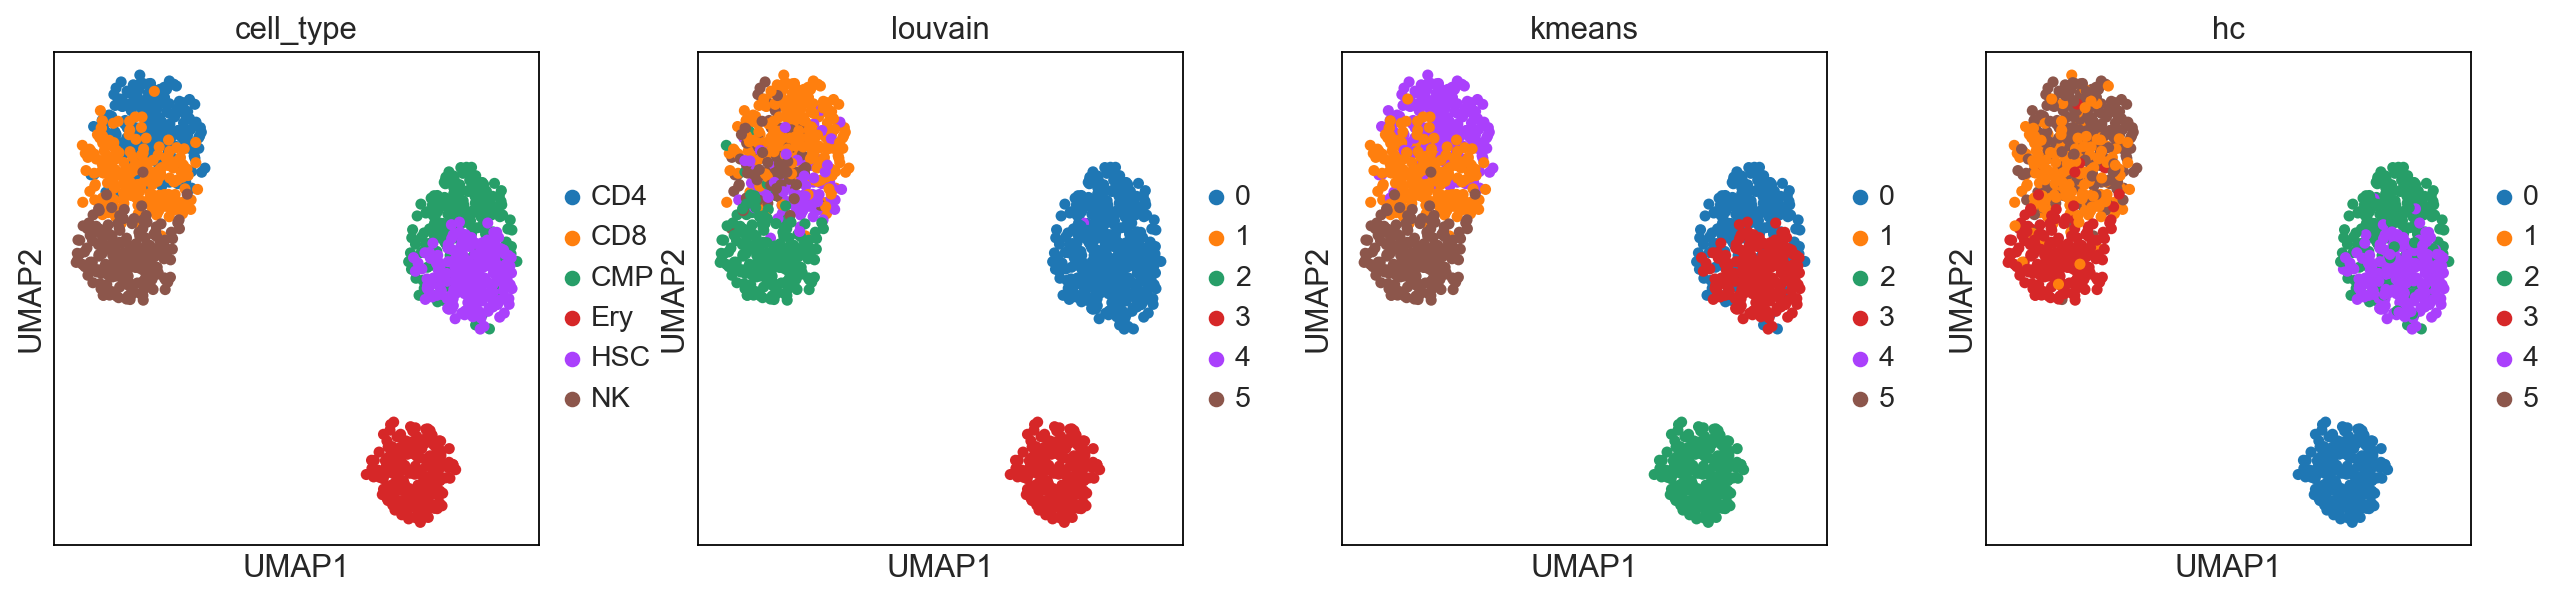

['BROCKMAN', '0.982333', '0.831069', '0.85348', '0.980535', '0.857435', '0.896508', '0.98062', '0.858096', '0.896072']
['Cusanovich2018', '1', '0.772794', '0.997997', '1', '0.899824', '0.997053', '1', '0.871049', '0.99707']
['cisTopic', '1', '1', '1', '1', '1', '1', '1', '1', '1']
['chromVAR_kmers', '0.843163', '0.799171', '0.76985', '0.868031', '0.842185', '0.812872', '0.867396', '0.842316', '0.812087']
['chromVAR_motifs', '0.512253', '0.504477', '0.505056', '0.654553', '0.656979', '0.647731', '0.654538', '0.658108', '0.634236']
['chromVAR_kmers_pca', '0.839422', '0.884756', '0.78633', '0.879319', '0.897241', '0.826066', '0.876413', '0.897375', '0.826903']
['chromVAR_motifs_pca', '0.64132', '0.509436', '0.505189', '0.724372', '0.656391', '0.637485', '0.724971', '0.65828', '0.633793']
['GeneScoring', '0.0618276', '0.454361', '0.391331', '0.0729624', '0.561881', '0.482972', '0.0756808', '0.540819', '0.454368']
['GeneScoring_pca', '0.408209', '0.428704', '0.442471', '0.559569', '0.526914

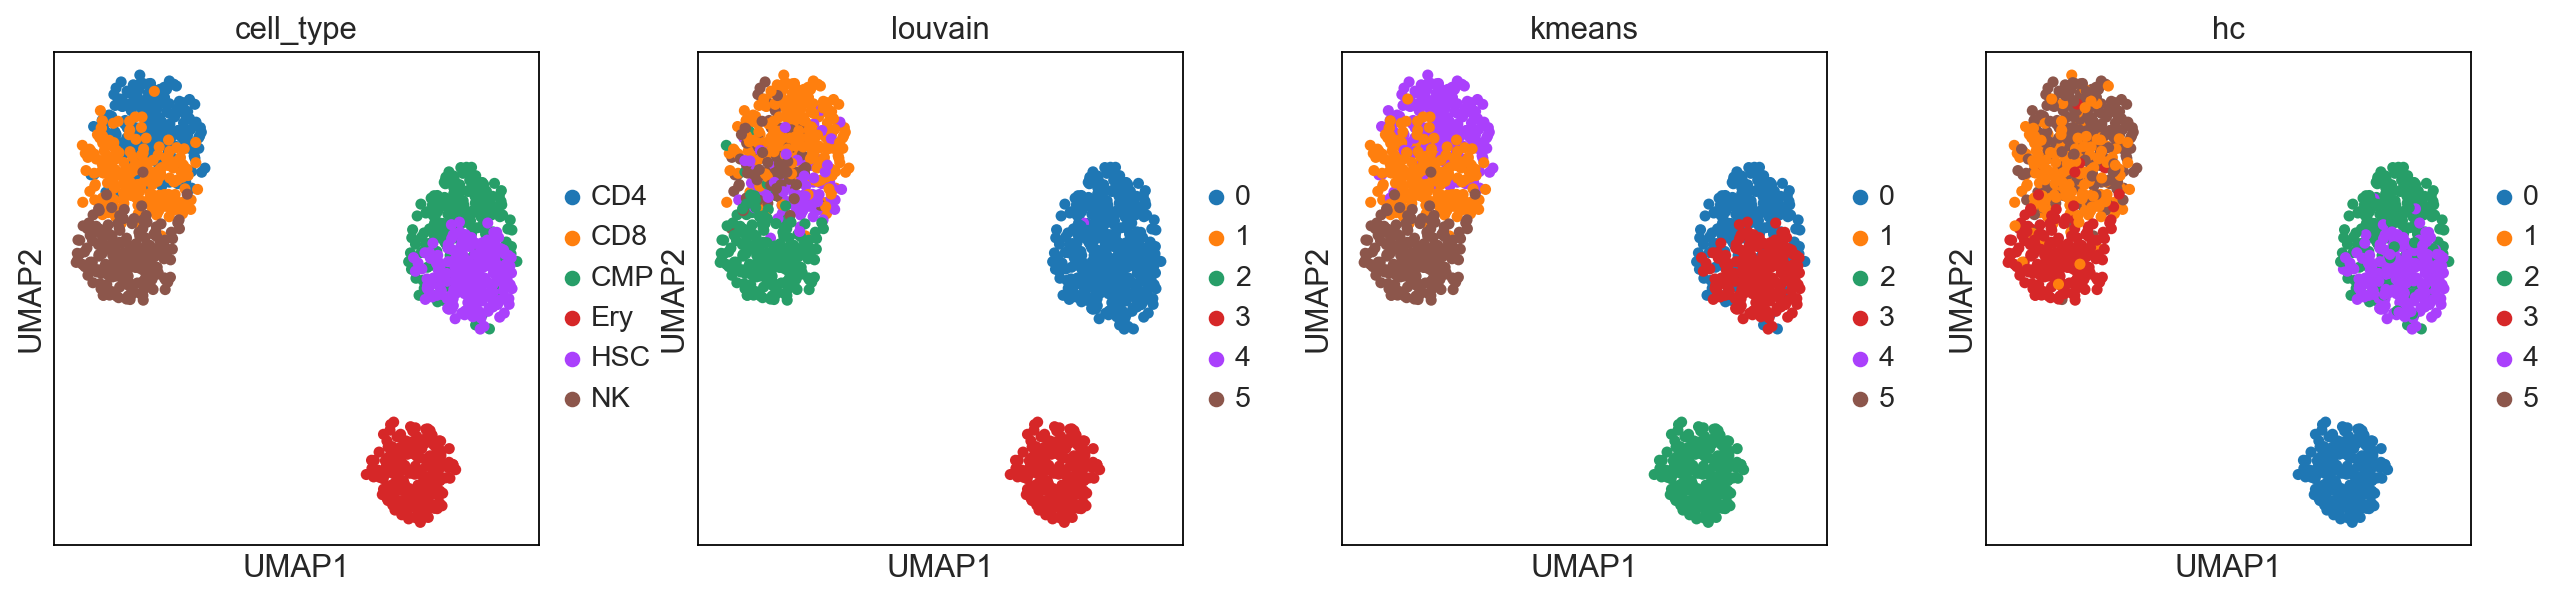

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,method
epiScanpy-adata,0.636418,0.969153,0.785679,0.741315,0.968799,0.825982,0.714634,0.968964,0.826461,epiScanpy-adata
BROCKMAN,0.982333,0.831069,0.853480,0.980535,0.857435,0.896508,0.980620,0.858096,0.896072,BROCKMAN
Cusanovich2018,1.000000,0.772794,0.997997,1.000000,0.899824,0.997053,1.000000,0.871049,0.997070,Cusanovich2018
cisTopic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,cisTopic
chromVAR_kmers,0.843163,0.799171,0.769850,0.868031,0.842185,0.812872,0.867396,0.842316,0.812087,chromVAR_kmers
chromVAR_motifs,0.512253,0.504477,0.505056,0.654553,0.656979,0.647731,0.654538,0.658108,0.634236,chromVAR_motifs
chromVAR_kmers_pca,0.839422,0.884756,0.786330,0.879319,0.897241,0.826066,0.876413,0.897375,0.826903,chromVAR_kmers_pca
chromVAR_motifs_pca,0.641320,0.509436,0.505189,0.724372,0.656391,0.637485,0.724971,0.658280,0.633793,chromVAR_motifs_pca
GeneScoring,0.061828,0.454361,0.391331,0.072962,0.561881,0.482972,0.075681,0.540819,0.454368,GeneScoring
GeneScoring_pca,0.408209,0.428704,0.442471,0.559569,0.526914,0.561940,0.533376,0.516252,0.538110,GeneScoring_pca


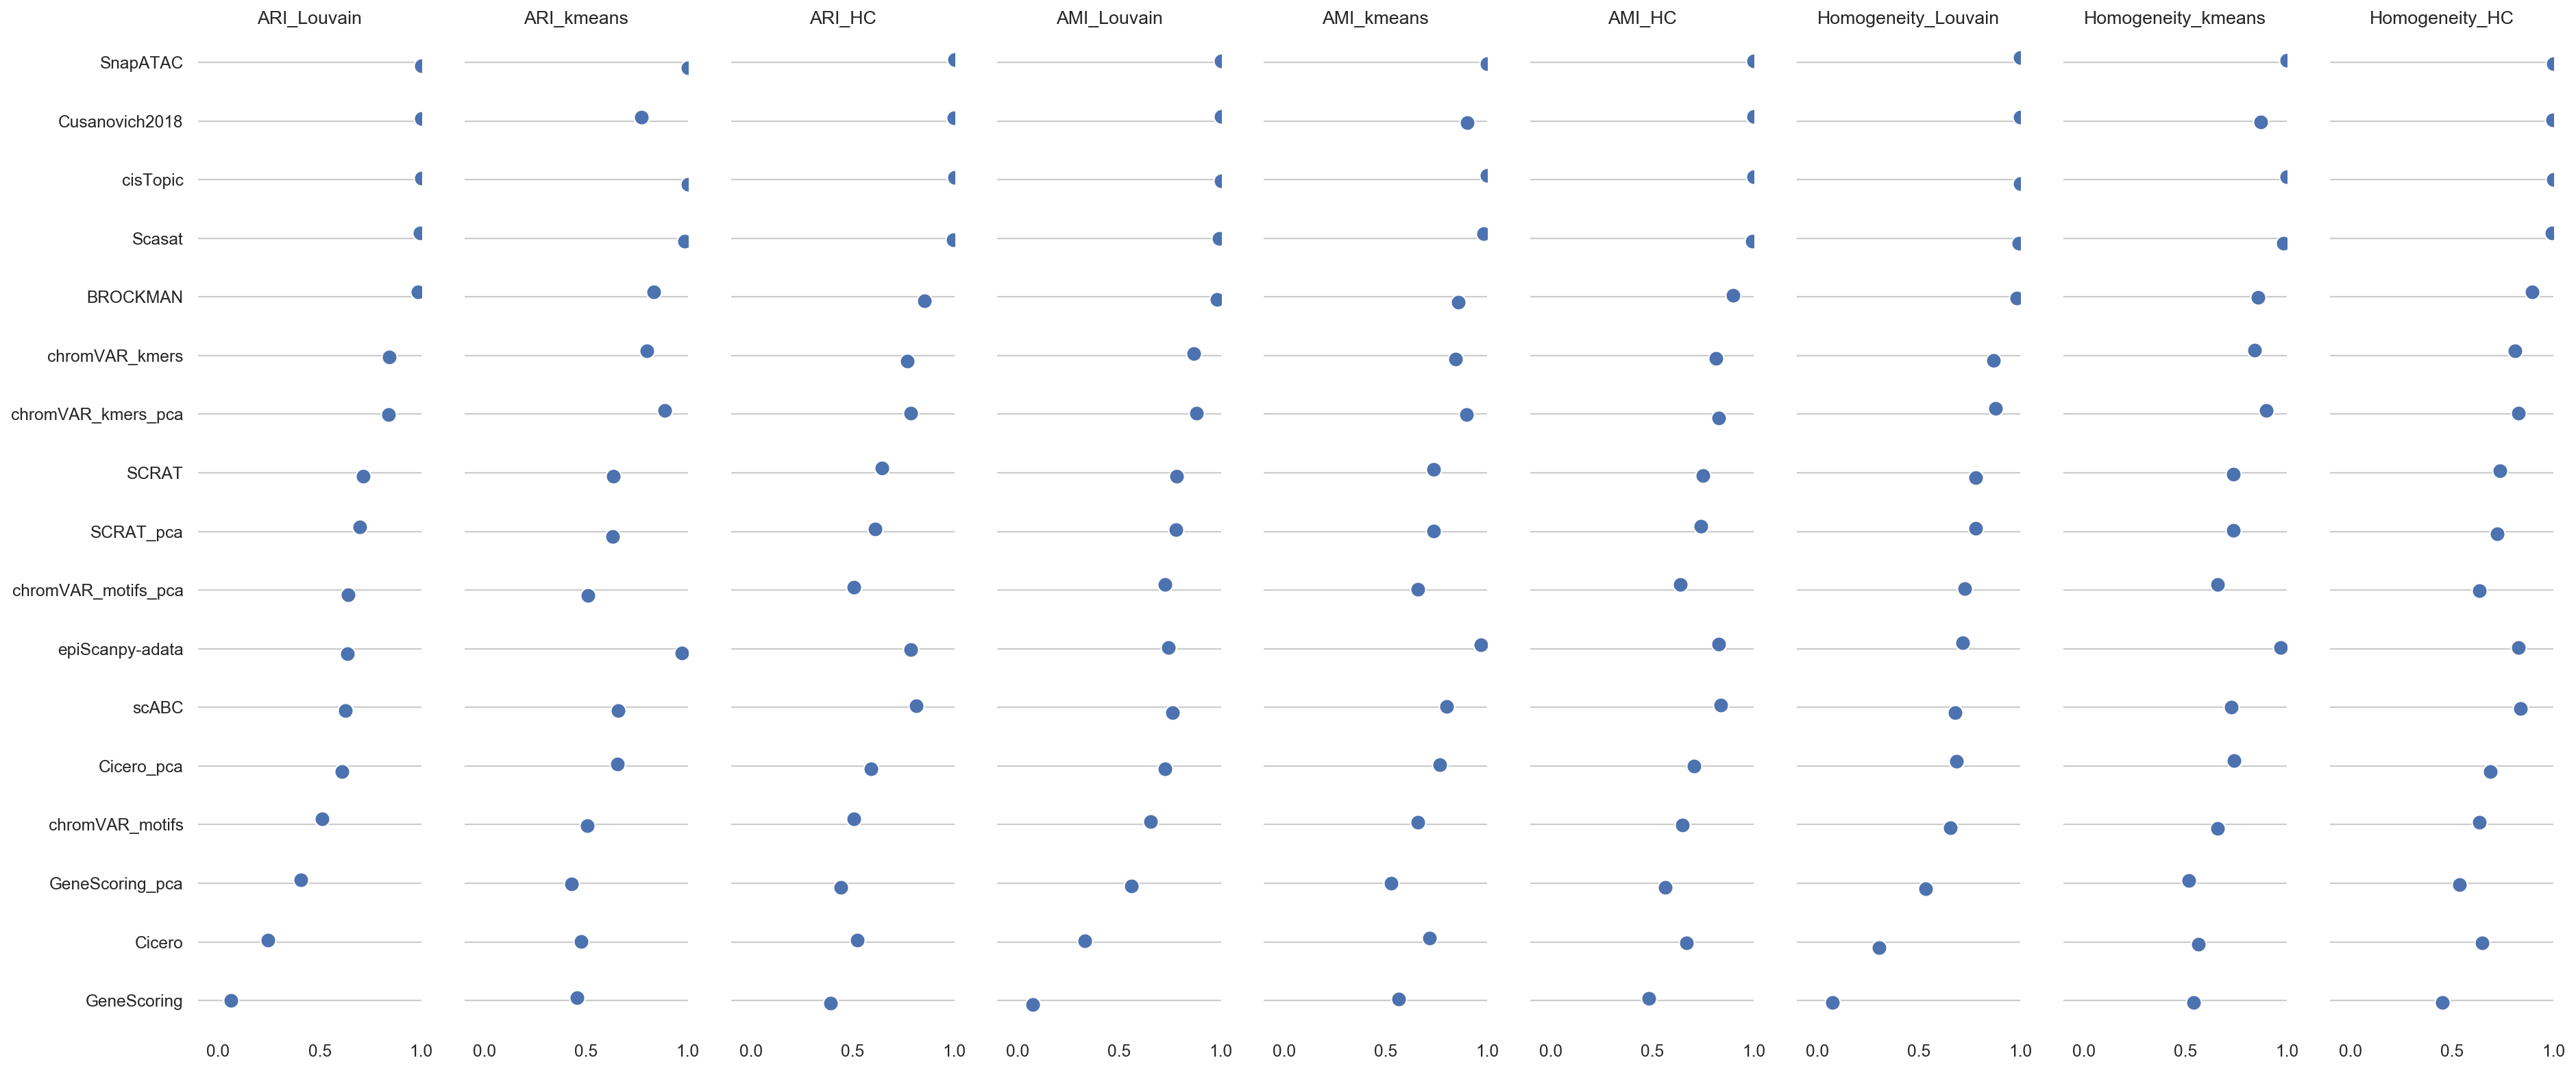

In [28]:
adata = adatavar.copy()

from sklearn.metrics import adjusted_rand_score

labels_true = adata.obs['cell_type']
labels_pred = adata.obs['louvain']
print(adjusted_rand_score(labels_true, labels_pred))

############ Benchmarking

import pandas as pd
import numpy as np
import scanpy as sc
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
import seaborn as sns


def getNClusters(adata,n_cluster,range_min=0,range_max=3,max_steps=20):
    this_step = 0
    this_min = float(range_min)
    this_max = float(range_max)
    while this_step < max_steps:
        print('step ' + str(this_step))
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.louvain(adata,resolution=this_resolution)
        this_clusters = adata.obs['louvain'].nunique()
        
        print('got ' + str(this_clusters) + ' at resolution ' + str(this_resolution))
        
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:
            return(this_resolution, adata)
        this_step += 1
    
    print('Cannot find the number of clusters')
    print('Clustering solution from last iteration is used:' + str(this_clusters) + ' at resolution ' + str(this_resolution))
    
    
    
df_metrics = pd.DataFrame(columns=['ARI_Louvain','ARI_kmeans','ARI_HC',
                                   'AMI_Louvain','AMI_kmeans','AMI_HC',
                                   'Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC'])


# set method name
method = 'epiScanpy-adata'

# convert the cell label to standard label
adata.obs['label'] = adata.obs['cell_type']

# set the number of cluster for louvain
num_clusters = len(np.unique(adata.obs['label']))
#print(num_clusters)

# set the epiScanpy metric raw in the pandas dataframe
df_metrics.loc[method,] = ""

## get the clusters

#Louvain
#sc.pp.neighbors(adata, n_neighbors=15,use_rep='X') # I MUST NOT recalculate the neighboring graph like this
#sc.tl.louvain(adata)
getNClusters(adata,n_cluster=num_clusters)

#kmeans
#kmeans = KMeans(n_clusters=num_clusters, random_state=2019).fit(adata.X)
kmeans = KMeans(n_clusters=num_clusters, random_state=2019).fit(adata.obsm['X_pca'])
adata.obs['kmeans'] = pd.Series(kmeans.labels_,index=adata.obs.index).astype('category')

#hierachical clustering
#hc = AgglomerativeClustering(n_clusters=num_clusters).fit(adata.X)
hc = AgglomerativeClustering(n_clusters=num_clusters).fit(adata.obsm['X_pca'])
adata.obs['hc'] = pd.Series(hc.labels_,index=adata.obs.index).astype('category')

#adjusted rank index
ari_louvain = adjusted_rand_score(adata.obs['label'], adata.obs['louvain'])
ari_kmeans = adjusted_rand_score(adata.obs['label'], adata.obs['kmeans'])
ari_hc = adjusted_rand_score(adata.obs['label'], adata.obs['hc'])
#adjusted mutual information
ami_louvain = adjusted_mutual_info_score(adata.obs['label'], adata.obs['louvain'],average_method='arithmetic')
ami_kmeans = adjusted_mutual_info_score(adata.obs['label'], adata.obs['kmeans'],average_method='arithmetic')   
ami_hc = adjusted_mutual_info_score(adata.obs['label'], adata.obs['hc'],average_method='arithmetic')
#homogeneity
homo_louvain = homogeneity_score(adata.obs['label'], adata.obs['louvain'])
homo_kmeans = homogeneity_score(adata.obs['label'], adata.obs['kmeans'])
homo_hc = homogeneity_score(adata.obs['label'], adata.obs['hc'])

df_metrics.loc[method,['ARI_Louvain','ARI_kmeans','ARI_HC']] = [ari_louvain,ari_kmeans,ari_hc]
df_metrics.loc[method,['AMI_Louvain','AMI_kmeans','AMI_HC']] = [ami_louvain,ami_kmeans,ami_hc]
df_metrics.loc[method,['Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC']] = [homo_louvain,homo_kmeans,homo_hc] 
#adata.obs[['louvain','kmeans','hc']].to_csv(os.path.join(path_clusters ,method + '_clusters.tsv'),sep='\t')

sc.pl.umap(adata, color=['cell_type', 'louvain', 'kmeans', 'hc'])

all_metrics = """Control	0.990084	0.98421	0.988131	0.987472	0.981477	0.985582	0.987544	0.981562	0.985662
BROCKMAN	0.982333	0.831069	0.85348	0.980535	0.857435	0.896508	0.98062	0.858096	0.896072
Cusanovich2018	1	0.772794	0.997997	1	0.899824	0.997053	1	0.871049	0.99707
cisTopic	1	1	1	1	1	1	1	1	1
chromVAR_kmers	0.843163	0.799171	0.76985	0.868031	0.842185	0.812872	0.867396	0.842316	0.812087
chromVAR_motifs	0.512253	0.504477	0.505056	0.654553	0.656979	0.647731	0.654538	0.658108	0.634236
chromVAR_kmers_pca	0.839422	0.884756	0.78633	0.879319	0.897241	0.826066	0.876413	0.897375	0.826903
chromVAR_motifs_pca	0.64132	0.509436	0.505189	0.724372	0.656391	0.637485	0.724971	0.65828	0.633793
GeneScoring	0.0618276	0.454361	0.391331	0.0729624	0.561881	0.482972	0.0756808	0.540819	0.454368
GeneScoring_pca	0.408209	0.428704	0.442471	0.559569	0.526914	0.56194	0.533376	0.516252	0.53811
Cicero	0.243898	0.475872	0.523611	0.331234	0.71664	0.668203	0.304208	0.565448	0.650277
Cicero_pca	0.608853	0.653923	0.5907	0.725897	0.764528	0.70686	0.685718	0.74116	0.69032
SnapATAC	1	1	1	1	1	1	1	1	1
Scasat	0.99402	0.984255	0.99402	0.991814	0.98177	0.992702	0.99186	0.981872	0.992735
scABC	0.625386	0.65761	0.81288	0.762979	0.800656	0.837973	0.678197	0.726589	0.838614
SCRAT	0.713639	0.631533	0.642085	0.780723	0.736164	0.748453	0.780032	0.736826	0.737397
SCRAT_pca	0.695512	0.628438	0.609265	0.777893	0.734144	0.738379	0.778124	0.734896	0.72327
"""


all_metrics = [line.split('\t') for line in  all_metrics.split('\n')[:-1]]

for line in all_metrics[1:]:
    print(line)
    df_metrics.loc[line[0],['ARI_Louvain','ARI_kmeans','ARI_HC']] = line[1:4]
    df_metrics.loc[line[0],['AMI_Louvain','AMI_kmeans','AMI_HC']] = line[4:7]
    df_metrics.loc[line[0],['Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC']] = line[7:]

sc.pl.umap(adata, color=['cell_type', 'louvain', 'kmeans', 'hc'])


for key in df_metrics.keys():
    df_metrics[key] = [float(key) for key in df_metrics[key]]
    
df_metrics['method'] = df_metrics.index.tolist()


sns.set(style="whitegrid")

# data to plot
df_metrics

# Make the PairGrid
g = sns.PairGrid(df_metrics.sort_values("ARI_Louvain",
                                        ascending=False),
                 x_vars=df_metrics.columns[:9], y_vars=["method"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      #palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.1, 1.), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['ARI_Louvain', 'ARI_kmeans', 'ARI_HC',
          'AMI_Louvain', 'AMI_kmeans', 'AMI_HC',
          'Homogeneity_Louvain', 'Homogeneity_kmeans', 'Homogeneity_HC']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

df_metrics

In [ ]:
%%R 
#install.packages('umap' ,repos = "http://cran.us.r-project.org")

library(umap)

run_umap <- function(fm_mat){
    umap_object = umap(t(fm_mat),random_state = 2019)
    df_umap = umap_object$layout
    return(df_umap)
}


plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap_1','umap_2','label')
    df_umap$umap_1 = as.numeric(df_umap$umap_1)
    df_umap$umap_2 = as.numeric(df_umap$umap_2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap_1, y = umap_2, color = label)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}